In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


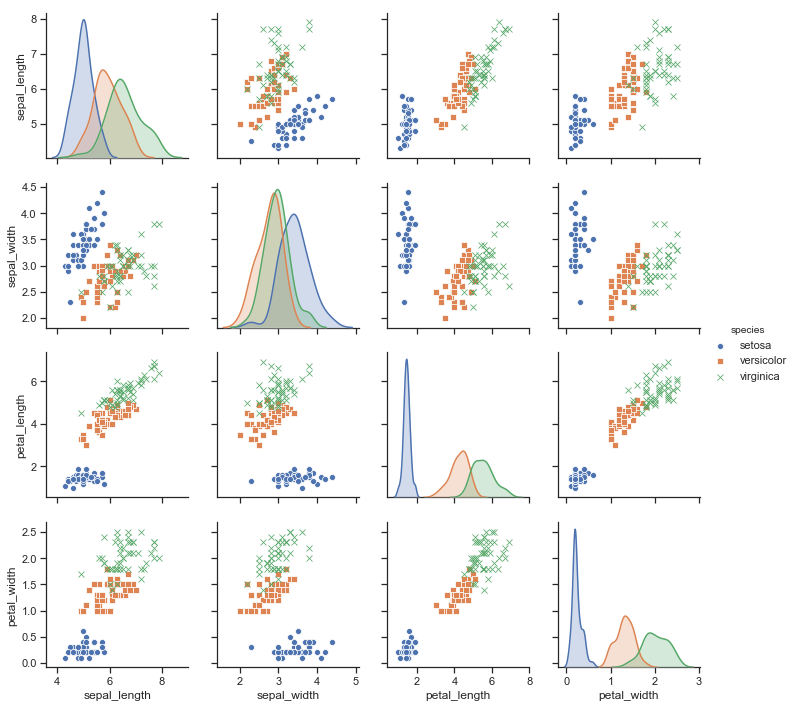

In [3]:
sns.set(style='ticks')

sns.pairplot(df,
             hue='species',
             markers=["o", "s", "x"])\
    .savefig('iris.png')

In [4]:
iris = datasets.load_iris()

type(iris)

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['filename', 'target_names', 'data', 'target', 'feature_names', 'DESCR'])

In [6]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris_df = iris_data.copy()
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris_df = iris_df.iloc[:, [1, 2, 4]]
iris_df = iris_df[iris_df['species'].isin([0, 1])]
iris_df.head()

,sepal width (cm),petal length (cm),species
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0


In [10]:
X = iris_df.iloc[:, :2].values
Y = iris_df.species.values

In [11]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)

In [12]:
class Perceptron:
    def  __init__(self, n_iter=10, eta=0.01):
        self.n_iter = n_iter
        self.eta = eta
        
    def output(self, input):
        weighted_sum = np.dot(input, self.__weights[1:]) + self.__weights[0]
        return self.__activate(weighted_sum)
    
    def fit(self, X, Y):
        self.__weights = np.zeros(X.shape[1] + 1)
        
        for i in range(self.n_iter):
            for j, (x, y) in enumerate(zip(X, Y)):
                y_output = self.output(x)
                diff = y - y_output
                if diff != 0:
                    print('iter: {}, y_index: {}, diff: {}'.format(i, j, diff))
                self.__weights += self.eta * diff * np.hstack((1, x))
    
    def __activate(self, weighted_sum):
        return self.__heaviside_step(weighted_sum)
    
    def __heaviside_step(self, z):
        return np.where(z < 0, 0, 1)

In [13]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

iter: 0, y_index: 0, diff: -1
iter: 0, y_index: 1, diff: 1
iter: 0, y_index: 2, diff: -1
iter: 0, y_index: 3, diff: 1
iter: 0, y_index: 13, diff: -1


In [14]:
perceptron.output(x_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0])

In [15]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0])